# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

[[1.000000e+00 1.900000e+03 3.610000e+06]
 [1.000000e+00 1.910000e+03 3.648100e+06]
 [1.000000e+00 1.920000e+03 3.686400e+06]
 [1.000000e+00 1.930000e+03 3.724900e+06]
 [1.000000e+00 1.941000e+03 3.767481e+06]
 [1.000000e+00 1.950000e+03 3.802500e+06]
 [1.000000e+00 1.960000e+03 3.841600e+06]
 [1.000000e+00 1.970000e+03 3.880900e+06]
 [1.000000e+00 1.980000e+03 3.920400e+06]
 [1.000000e+00 1.990000e+03 3.960100e+06]
 [1.000000e+00 2.000000e+03 4.000000e+06]
 [1.000000e+00 2.010000e+03 4.040100e+06]]
501596.69896291976 -549.8998014613501 0.1513877127640438
4745.087199790636
6051.288177001872
8521.523173396941


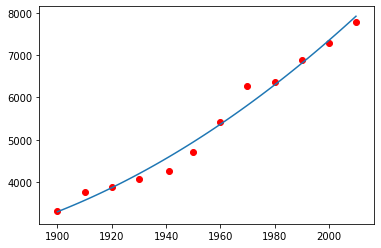

In [15]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
#.T is the transpose of our matrix. Numpy by def stores vectors as rows, we want them as columns
B = matrix([ones(n), year, year**2]).T
BT = B.T

print(B)
y = matrix(population).T

#This solves the linear system BT*B a = BT y
a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

#Change the notebook to answer this:

#2) Can you change the value of m? Write a function that allows us to carry us this thing for different m values
#Also compare the result to interpolation (what should I compare? Should I just plot it?)
#3) from (xi,yi) data collected by swiss population, we got f(x) = a0 + a1x + a2x^2. Let's assume there was noise
# in the measurement of data and we model it as epsilon_i like N(0,sigma^2).
# What is the expected value of the coefficients and what is the variance?
# We should generate the epsilon_i with a numpy function many times for each i, 
#so that we can evaluate mean and variance

[-4.154421483764827e-05, 0.3213542642110303, -931.7689615745674, 1200277.3411680008, -579598109.8633394]


"\n#This solves the linear system BT*B a = BT y\na = linalg.solve(BT*B, BT*y)\na0 = float(a[0])\na1 = float(a[1])\na2 = float(a[2])\nprint(a0, a1, a2)\n\nxx = linspace(1900,2010,100)\nf = lambda x: a0 + a1*x + a2*x**2\n\n_ = plot(xx, f(xx))\n_ = scatter(year, population, color='r')\n\n\n\nprint(f(1945))\nprint(f(1975))\nprint(f(2020))\n"

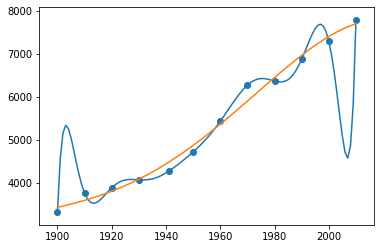

In [52]:
#Number 2

%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)

def generate_lagrangian_basis(q,e):
    """
    We are evaluating the array e in the polynomial written w
    ith lagrangian basis interpolating on points q
    q: array of interpolation points
    e: array of evaluation points
    """
    assert len(q.shape) == 1 #assert: check if this is true
    assert len(e.shape) == 1 
    
    n_evaluation_points = e.shape[0] # Aka, number of rows
    n_interpolation_points = q.shape[0]
    
    #Create a big table full of ones
    basis = np.ones(
        (n_evaluation_points, n_interpolation_points),
        dtype = np.float64
    )
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            for k in range(n_interpolation_points):
                if j == k:
                    continue
                basis[i,j] *=  (e[i] - q[k]) / (q[j]- q[k])
    return basis   

def interpolate_function(p,q,e):
    basis = generate_lagrangian_basis(q,e)
    
    n_evaluation_points = e.shape[0]
    n_interpolation_points = q.shape[0]
    
    y = np.zeros(n_evaluation_points)
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            y[i] = y[i] + p[j]* basis[i,j]
            
    return y   

def swiss_least_squares(m,y,x):
    n = len(y)
    in_array = ones(n)
    for i in range(1,m+1):
        col_to_be_added = x**i
        res = column_stack((in_array,col_to_be_added))
        in_array = res
    
    B = res
    BT = B.T
    
    yM = matrix(y).T
    lhs = dot(BT,B)
    rhs = dot(BT,yM)

    a = linalg.solve(lhs,rhs)
    
    coeff = []
    for i in range(m+1):
        coeff.append(float(a[i]))
    
    coeff = coeff[::-1]
    print(coeff)
    xx = linspace(min(x),max(x),max(x)-min(x))
    f = poly1d(coeff)

    
    plot(xx, interpolate_function(y,x,xx))
    plot(xx,f(xx))
    scatter(x,y)
    return f


    
    
 
    
#fh = figure(size(10,10))
#plot(e, interpolate_function(sinus_f, q,e))

swiss_least_squares(4,x=year,y=population)  

#for i in range(2,7):
    #fh.subplot(1,5-2,i-1)
 #   swiss_least_squares(i,x=year,y=population)  


'''
#This solves the linear system BT*B a = BT y
a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))
'''
#B = matrix([ones(n), year, year**2]).T
#BT = B.T

In [ ]:

def (x,y,n):